# Predicting the risk for heart disease with a classification model


This notebook is part of my **MLzoomcamp Midterm Project**. It presents an Exploratory Data Analysis using the library Sweetviz.

## The problem

The [risk for heart disease](https://www.cdc.gov/heartdisease/risk_factors.htm) can be associated with health conditions and factors such as lifestyle, age, and family history. A binary classification model based on these variables collected from patients can help in healthcare diagnosis.

## The data

A [reduced version](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) of the [CDC](https://www.cdc.gov/) dataset (February 2022 update) containing several features that can be associated with the risk of heart disease is used to build the classification model. Reduced here means that the 300 variables from the original dataset were reduced to 20.  

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sweetviz as sv
import sys

# importing user defined funtions
sys.path.append("../src")
from utility import (
    dataset_dimensions, 
    rename_columns,
    column_missing_values, 
    column_unique_values, 
)

# Data loading

In [2]:
df = pd.read_csv('../data/heart_2020_cleaned.csv')

In [3]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


# Get to know the data

In [4]:
# convert column names from CamelCase to snake_case
rename_columns(df)
df.head(3)

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [5]:
# convert columns values to lowercase
columns_to_lowercase = [
    'heart_disease',
    'smoking',
    'alcohol_drinking',
    'stroke',
    'diff_walking',
    'sex',
    'race',
    'diabetic',
    'physical_activity',
    'gen_health',
    'asthma',
    'kidney_disease',
    'skin_cancer'
]

for column in columns_to_lowercase:
    df[column] = df[column].str.lower()

In [6]:
df.head(3)

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,no,16.60,yes,no,no,3.0,30.0,no,female,55-59,white,yes,yes,very good,5.0,yes,no,yes
1,no,20.34,no,no,yes,0.0,0.0,no,female,80 or older,white,no,yes,very good,7.0,no,no,no
2,no,26.58,yes,no,no,20.0,30.0,no,male,65-69,white,yes,yes,fair,8.0,yes,no,no


In [7]:
# looking for missing values in columns
column_missing_values(df)

No missing values found!


In [8]:
# number of unique values in each column
column_unique_values(df)

           heart_disease: 2
                     bmi: 3604
                 smoking: 2
        alcohol_drinking: 2
                  stroke: 2
         physical_health: 31
           mental_health: 31
            diff_walking: 2
                     sex: 2
            age_category: 13
                    race: 6
                diabetic: 4
       physical_activity: 2
              gen_health: 5
              sleep_time: 24
                  asthma: 2
          kidney_disease: 2
             skin_cancer: 2


In [9]:
dataset_dimensions(df)

Dimensions of the dataset:
 Number of rows:    319795
 Number of columns: 18



In [10]:
# dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   heart_disease      319795 non-null  object 
 1   bmi                319795 non-null  float64
 2   smoking            319795 non-null  object 
 3   alcohol_drinking   319795 non-null  object 
 4   stroke             319795 non-null  object 
 5   physical_health    319795 non-null  float64
 6   mental_health      319795 non-null  float64
 7   diff_walking       319795 non-null  object 
 8   sex                319795 non-null  object 
 9   age_category       319795 non-null  object 
 10  race               319795 non-null  object 
 11  diabetic           319795 non-null  object 
 12  physical_activity  319795 non-null  object 
 13  gen_health         319795 non-null  object 
 14  sleep_time         319795 non-null  float64
 15  asthma             319795 non-null  object 
 16  ki

In [11]:
# descriptive statistics for numeric variables
df.describe()

,bmi,physical_health,mental_health,sleep_time
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Exploratory Data Analysis with `Sweetviz`

A faster way to generate visualizations for an EDA is using the library [Sweetviz](https://github.com/fbdesignpro/sweetviz) that takes pandas dataframes and creates an HTML report that can be viewed by itself in a browser or integrated into notebooks.

Besides feature analysis this library can also shows how the target variable is related to the explanatory variables (the blue line in the plots) and the correlations/associations in one plot.

                                             |                                    | [  0%]   00:00 -> (? left)


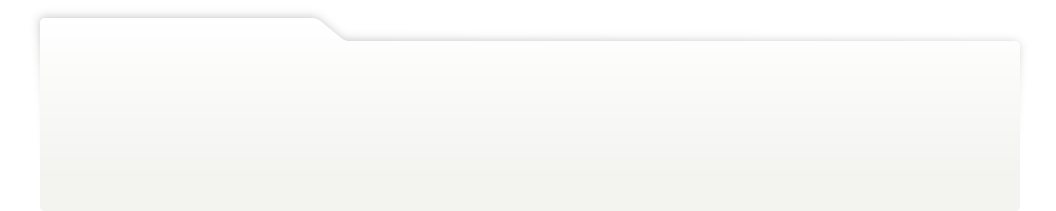
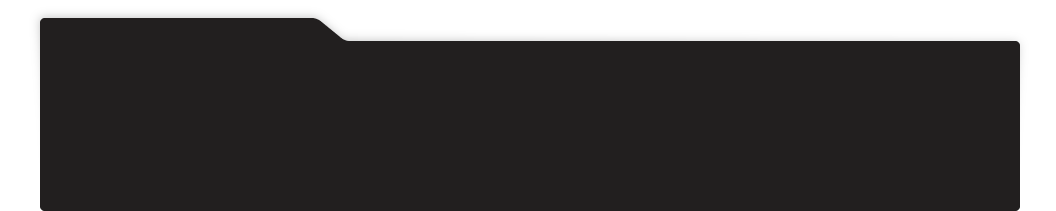
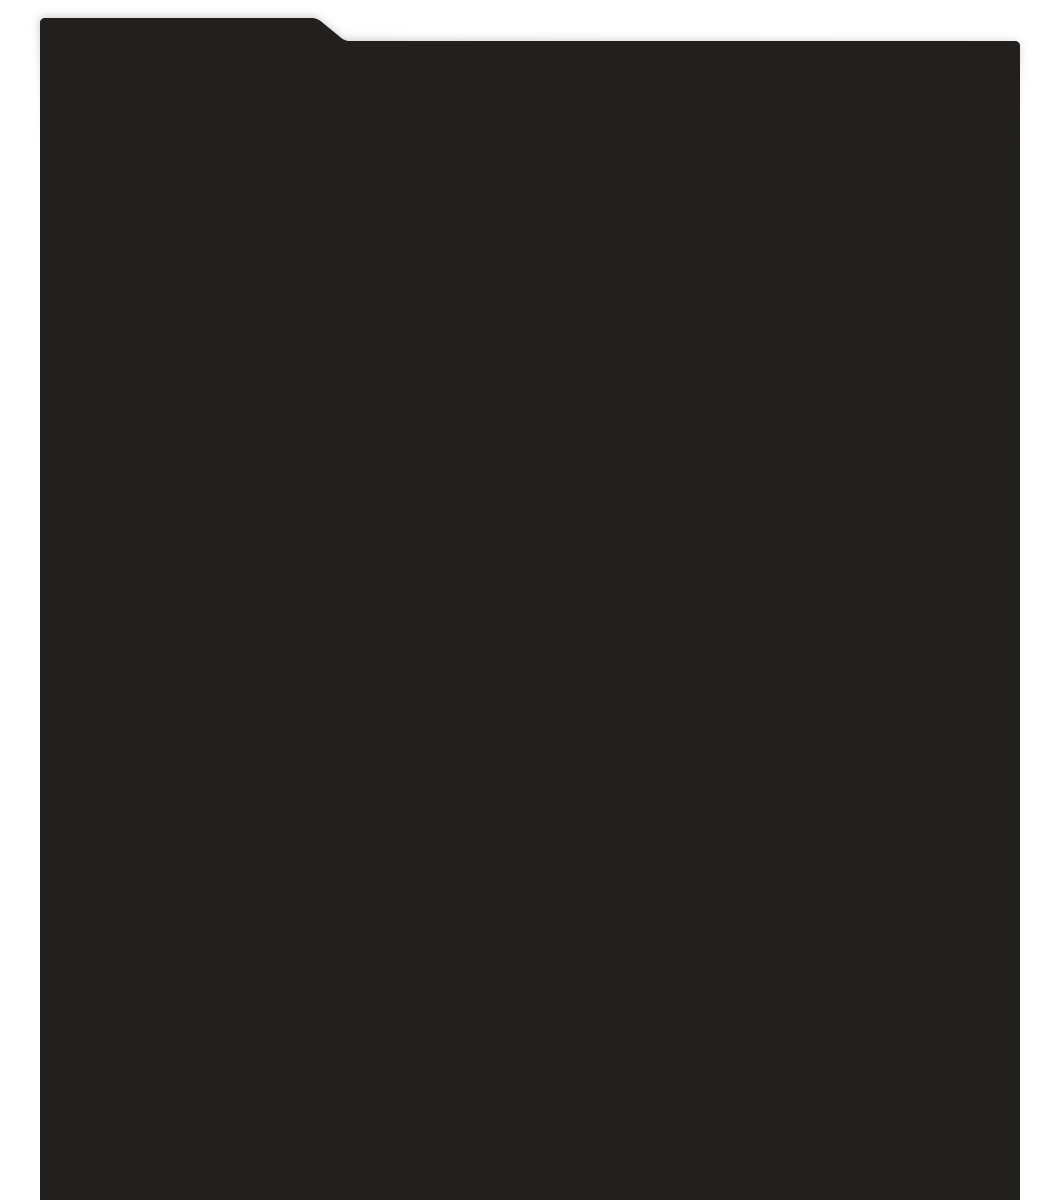
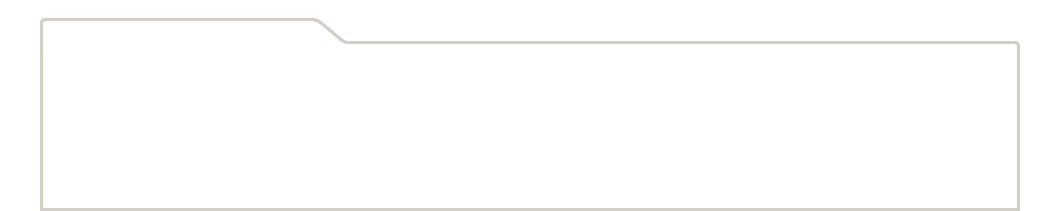
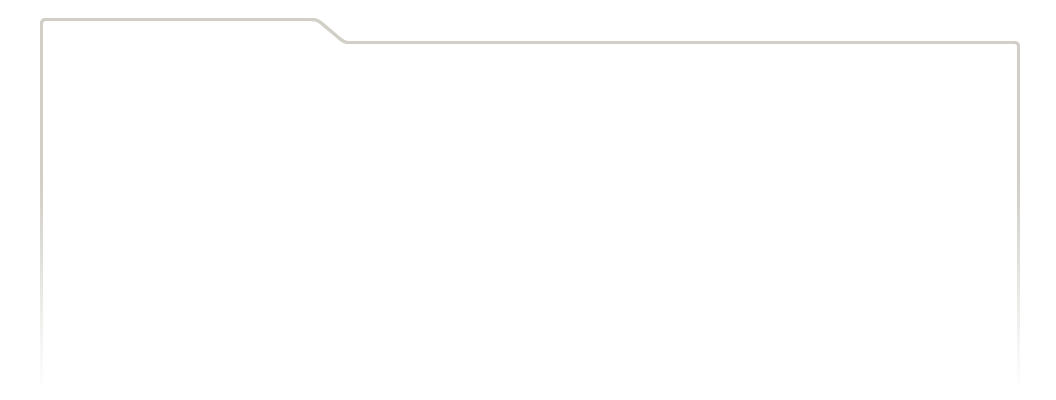
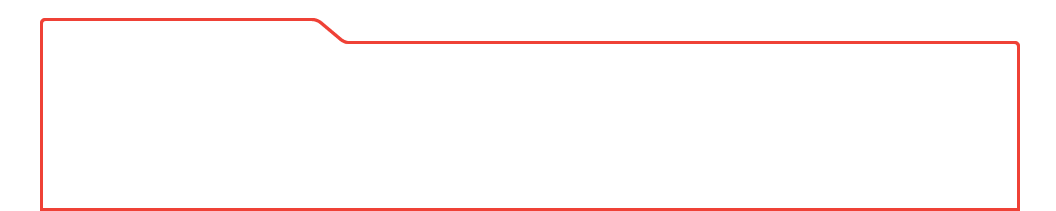
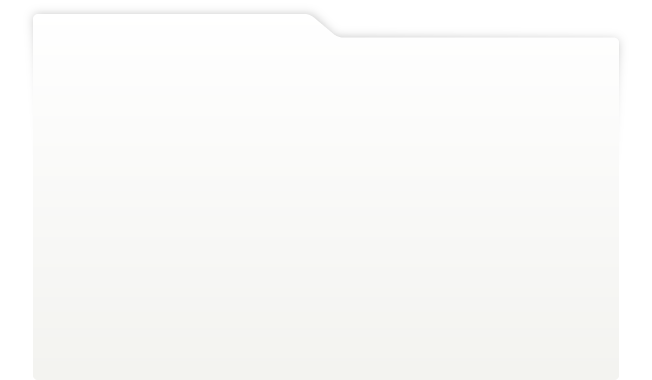
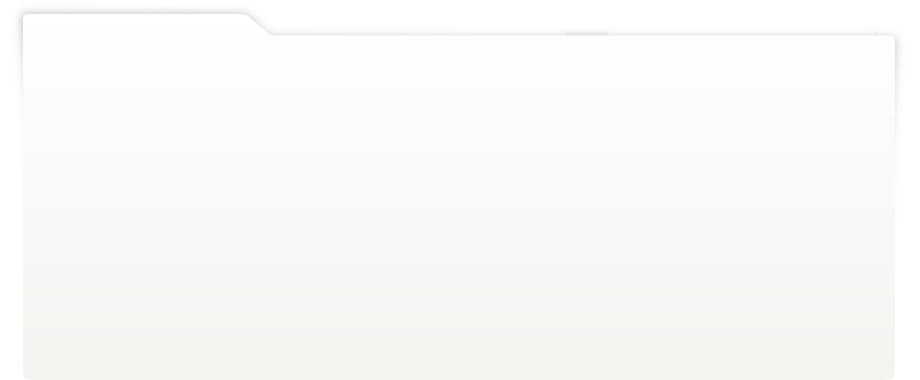
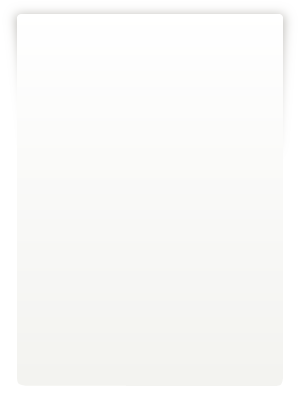
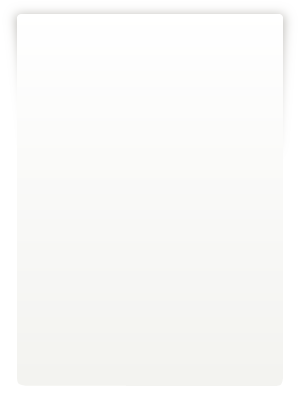
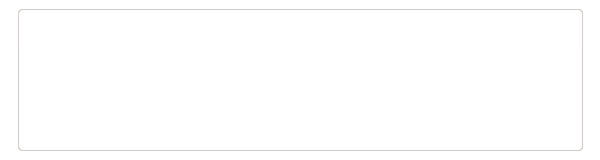
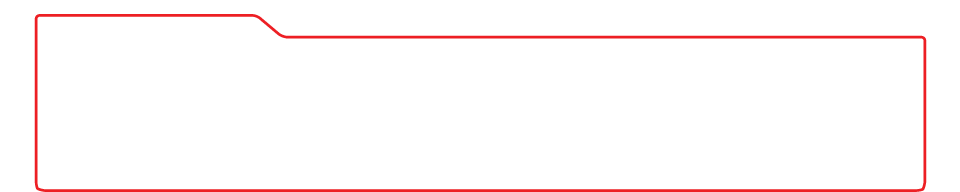
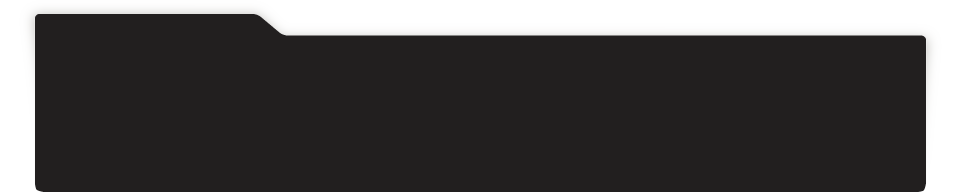
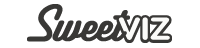
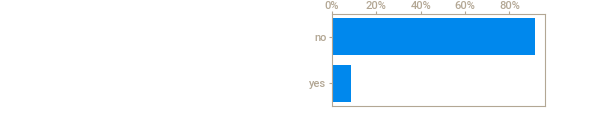
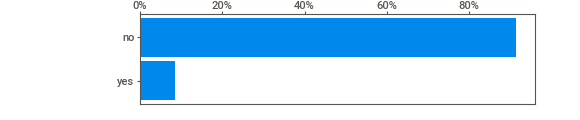
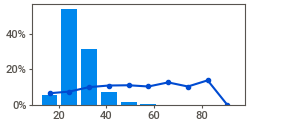
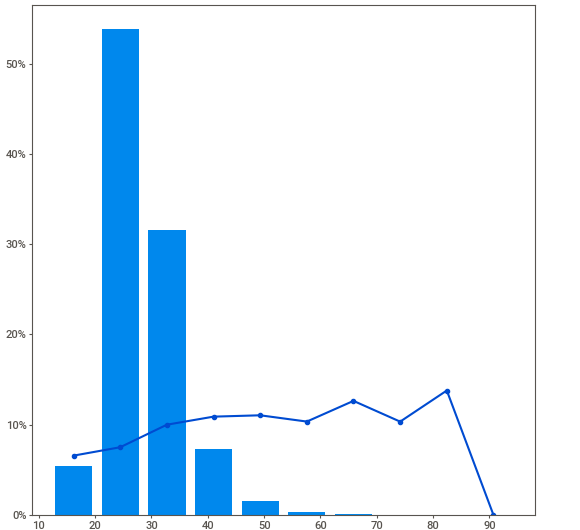
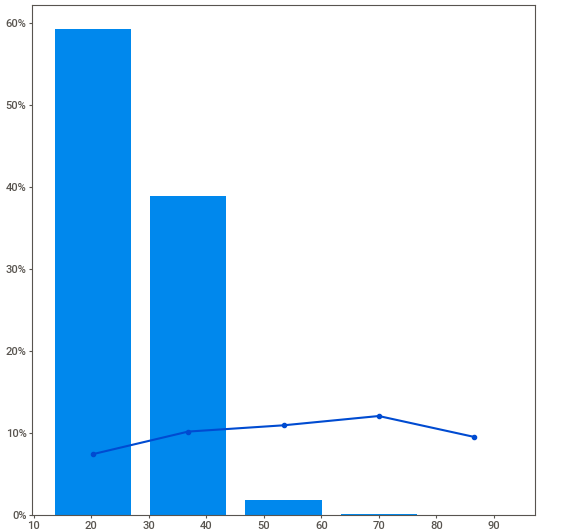
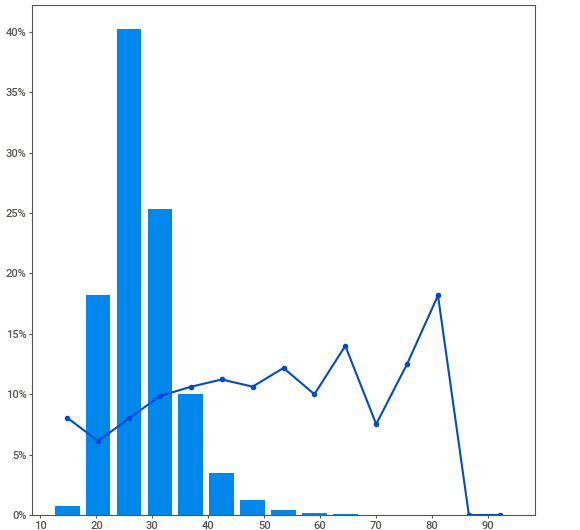
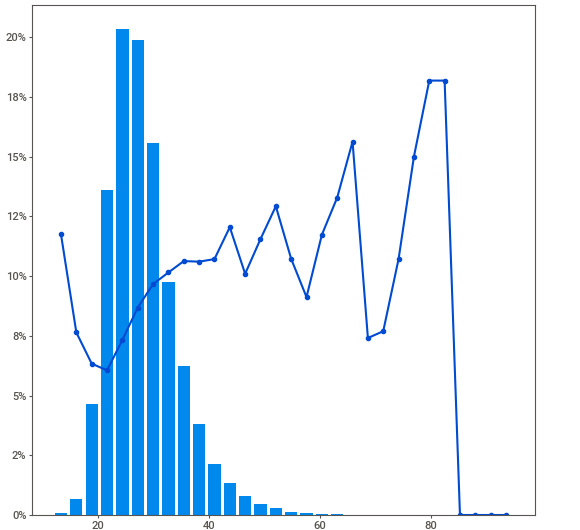
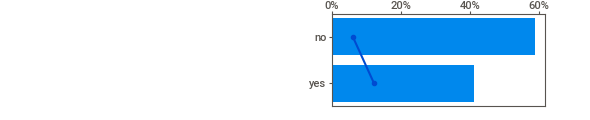
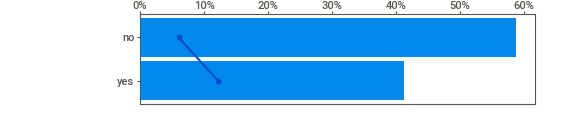
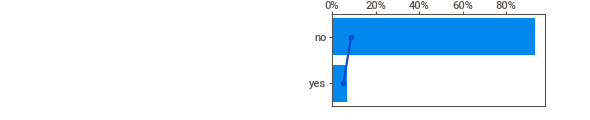
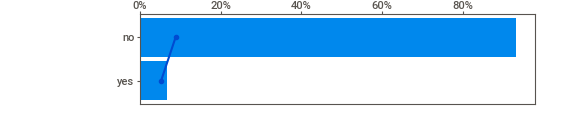
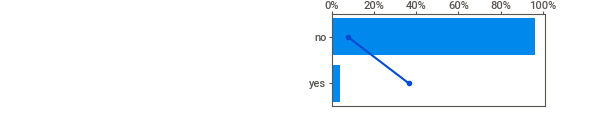
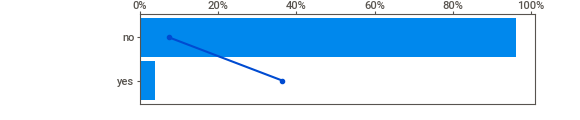
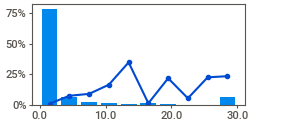
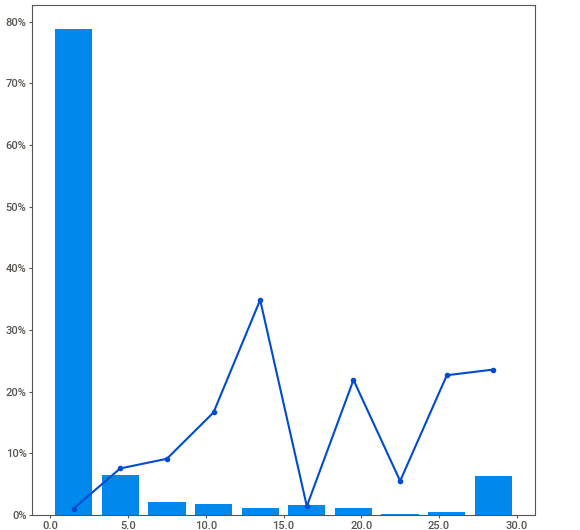
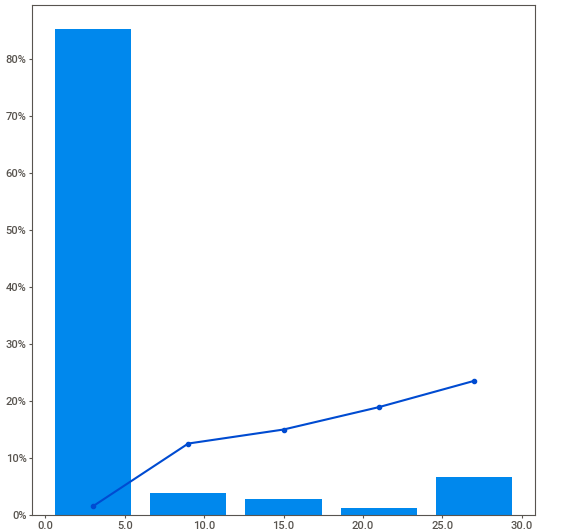
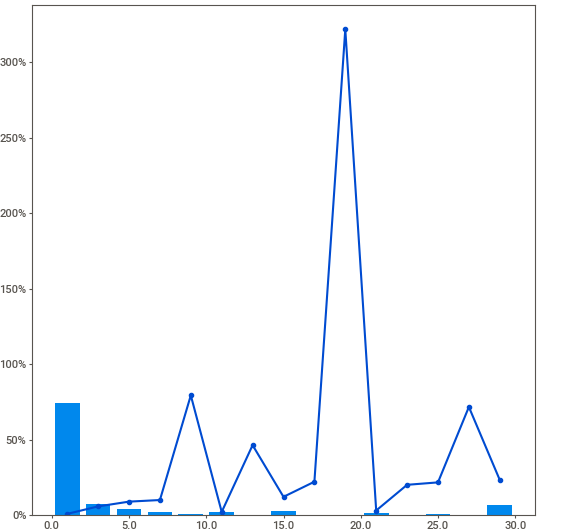
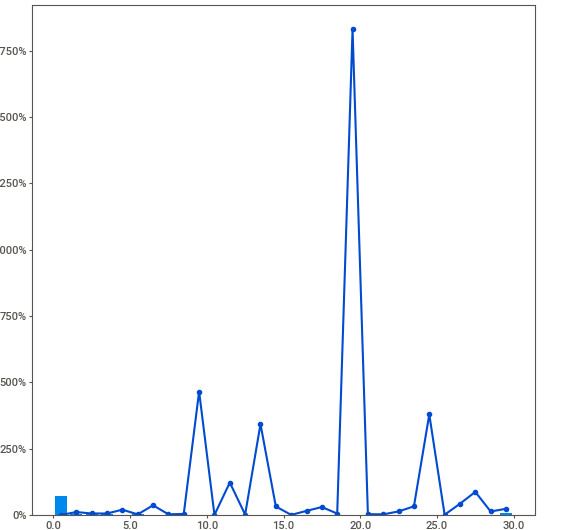
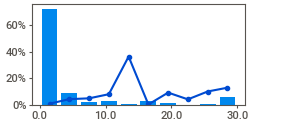
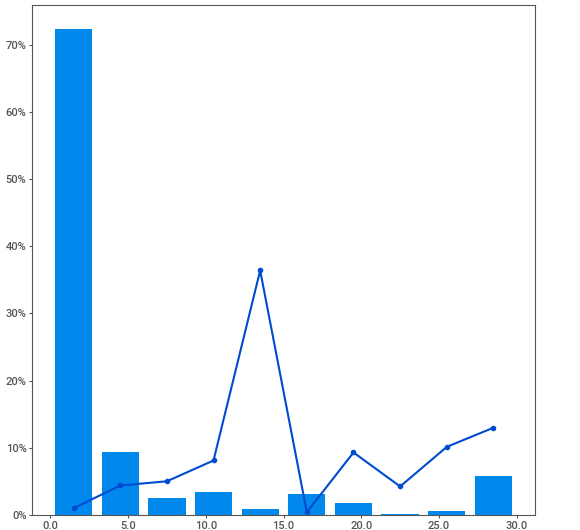
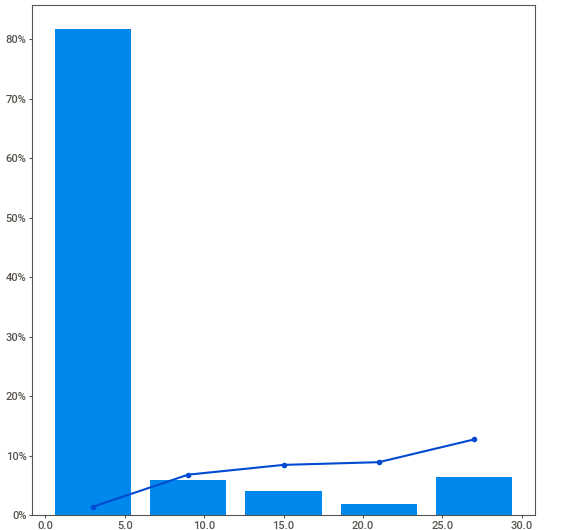
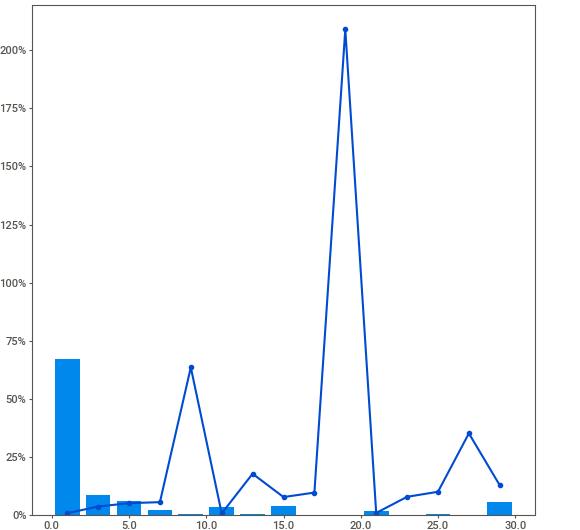
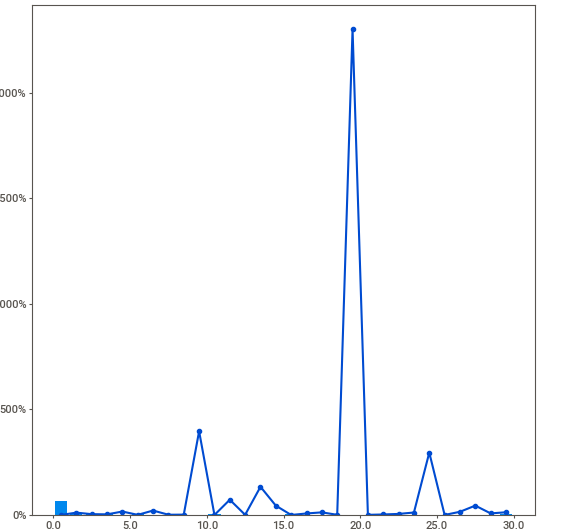
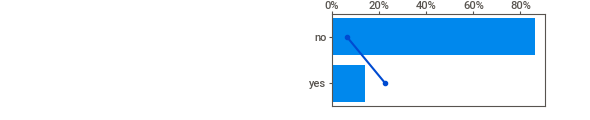
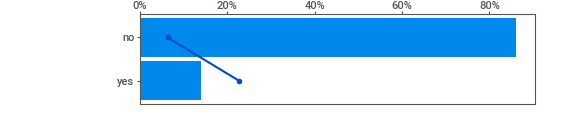
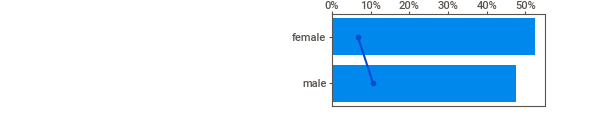
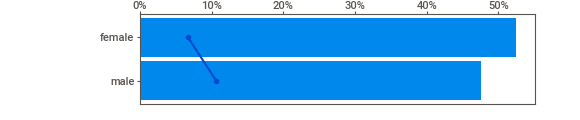
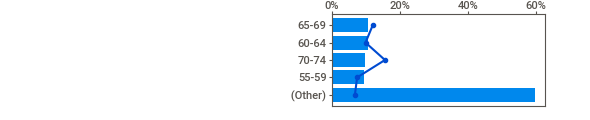
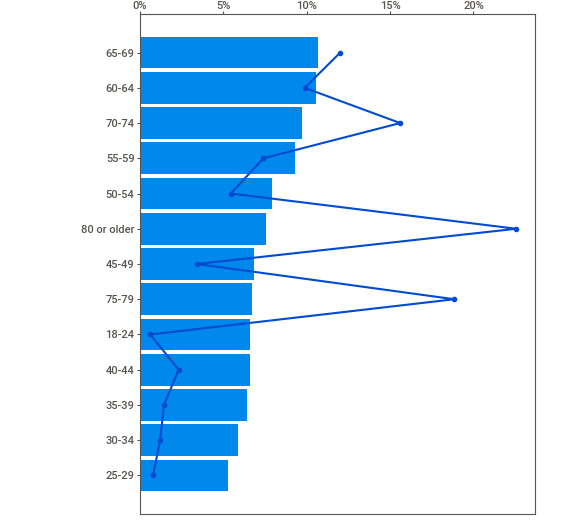
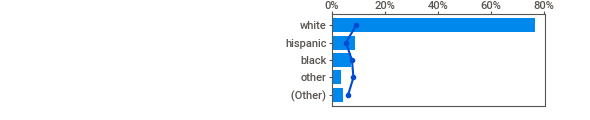
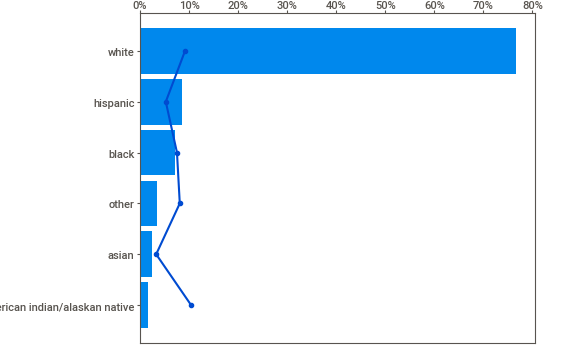
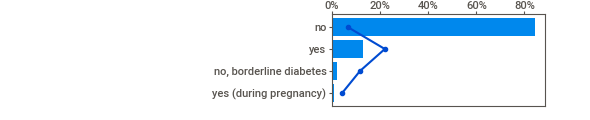
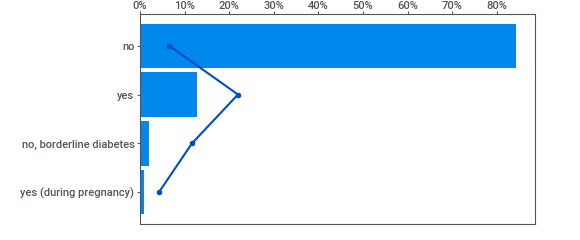
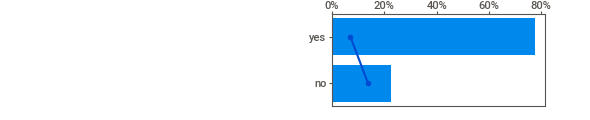
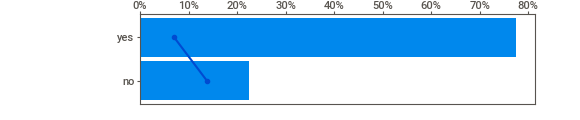
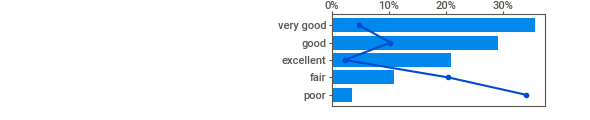
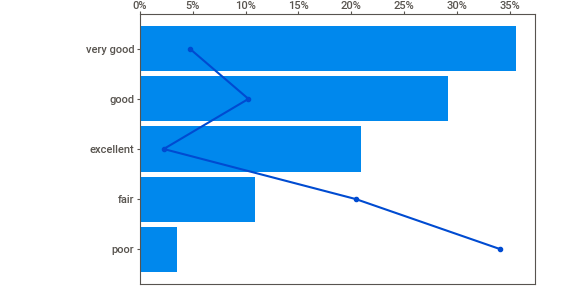
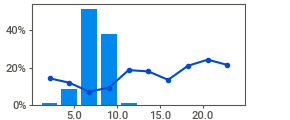
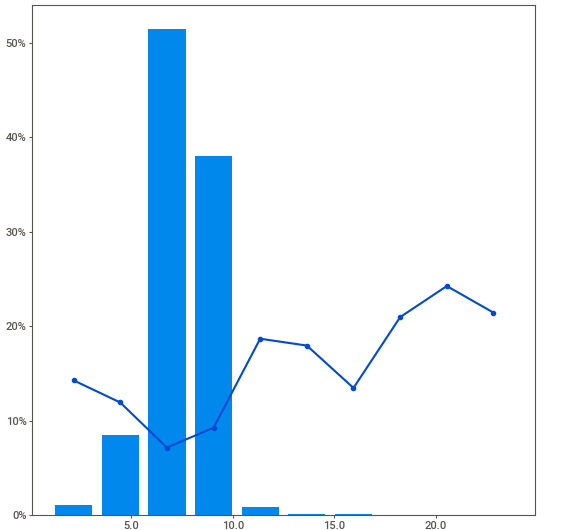
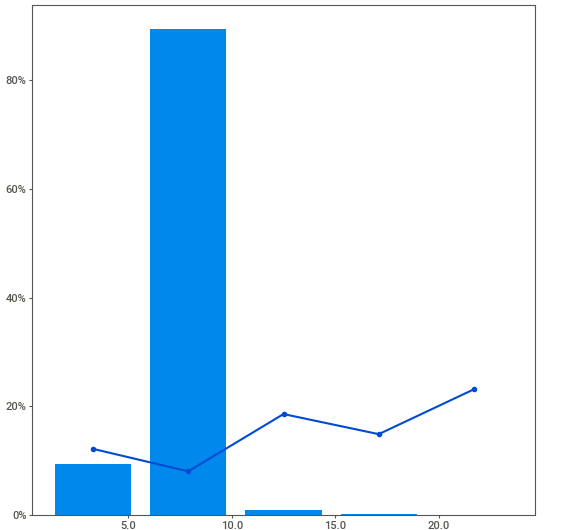
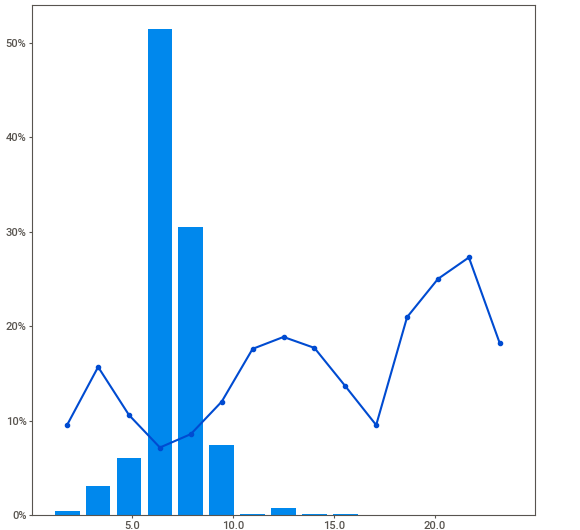
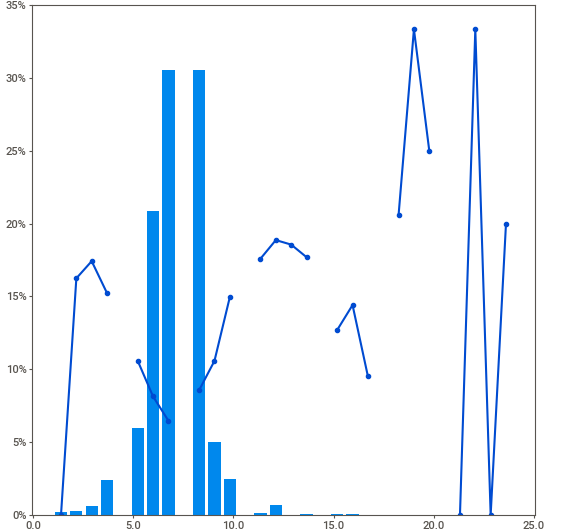
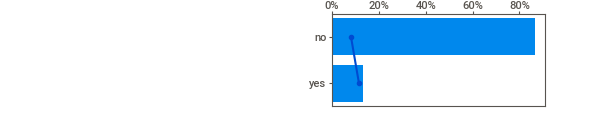
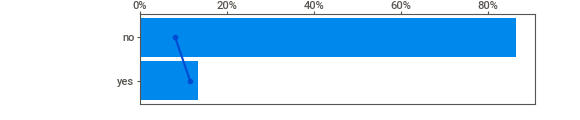
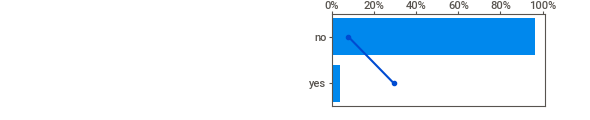
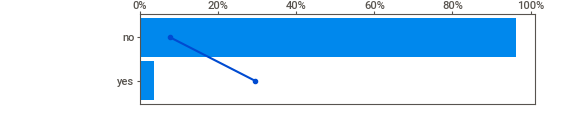
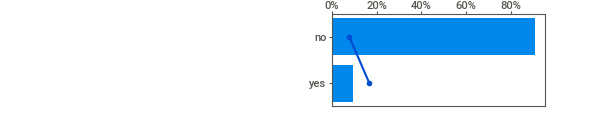
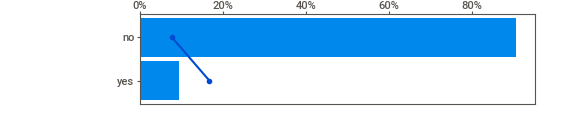
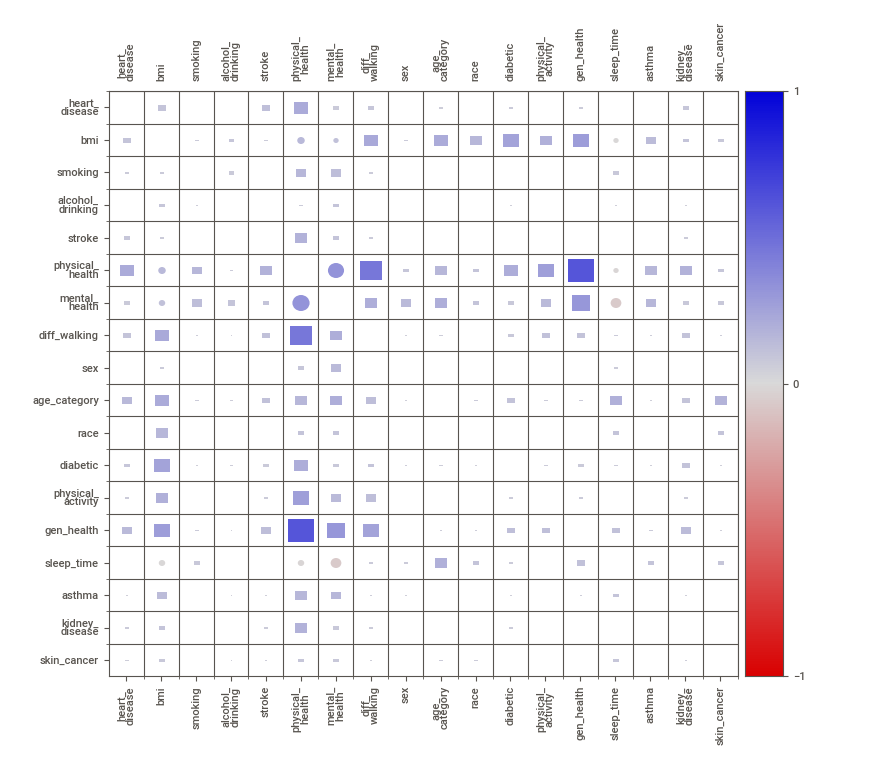
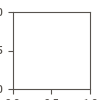

In [12]:
# analyzing the dataset using sweetviz
eda_report = sv.analyze(df, target_feat='heart_disease')

# to automaticaly display the report
eda_report.show_notebook(layout='vertical', w=800, h=700, scale=0.8)

In [13]:
# target variable
df['heart_disease'].value_counts(normalize=True).round(2)

no     0.91
yes    0.09
Name: heart_disease, dtype: float64

## Imbalanced dataset
The target variable `heart_disease`, shows that the dataset is imbalanced since the positive class values highly differ from the negative class values:
* positive class: 9% of the dataset
* negative class:91% of the dataset

## Duplicates

### Inspect

In [14]:
# number of duplicates 
df[df.duplicated(keep='first')].shape[0]

18078

* There are 18078 duplicates
* If someone wants to inspect the duplicated data, it's possible to create a dataframe containing the index of the duplicated rows and their values.

In [15]:
# create a dataframe com all duplicated rows
df_duplicates = df[df.duplicated(keep=False)]

In [16]:
df_duplicates.head(3)

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
24,no,25.75,no,no,no,0.0,0.0,no,female,80 or older,white,no,yes,very good,6.0,no,no,yes
41,no,28.13,no,no,no,0.0,0.0,no,male,60-64,white,no,yes,excellent,8.0,no,no,no
46,no,33.23,no,no,no,0.0,0.0,no,male,65-69,white,yes,yes,very good,8.0,no,no,no


In [17]:
# create a tuple containing the indexes of duplicated rows groupby all columns
df_duplicates_index = df_duplicates.groupby(list(df_duplicates)).apply(lambda x: tuple(x.index)).tolist()
df_duplicates_index[:10]

[(186950, 187048, 188282, 188328),
 (75493, 104851),
 (20332, 230319),
 (154193, 168816),
 (21542, 215928),
 (101319, 294295),
 (145663, 164383),
 (140819, 228228),
 (96504, 254600),
 (186337, 258425)]

In [18]:
#  create a tuple containing the indexes of duplicated rows groupby all columns and show the values
df_duplicates_index_values = (df_duplicates.groupby(df_duplicates.columns.tolist())
       .apply(lambda x: tuple(x.index))
       .reset_index(name='idx'))

df_duplicates_index_values.head(3)

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer,idx
0,no,15.43,no,no,no,0.0,0.0,yes,male,35-39,american indian/alaskan native,no,yes,good,8.0,yes,no,no,"(186950, 187048, 188282, 188328)"
1,no,16.24,yes,no,no,2.0,10.0,no,male,18-24,white,no,yes,good,5.0,no,no,no,"(75493, 104851)"
2,no,16.64,no,no,no,0.0,0.0,no,female,80 or older,white,no,yes,very good,8.0,no,no,no,"(20332, 230319)"


### Remove

In [19]:
# dropping duplicates
df.drop_duplicates(keep='first', inplace=True)

In [20]:
# new dimensions of the dataset
dataset_dimensions(df)

Dimensions of the dataset:
 Number of rows:    301717
 Number of columns: 18



In [21]:
df.heart_disease.value_counts(normalize=True).round(2)

no     0.91
yes    0.09
Name: heart_disease, dtype: float64

# Data saving

In [22]:
# save the dataset
df.to_csv('../data/heart_2020_cleaned_no-duplicates.csv', index=False)